In [1]:
from PIL import Image

In [2]:
image_path = 'photos/jasne.jpg'

In [3]:
image_pil = Image.open(image_path)

In [4]:
print(pytesseract.image_to_string(image_pil))

NameError: name 'pytesseract' is not defined

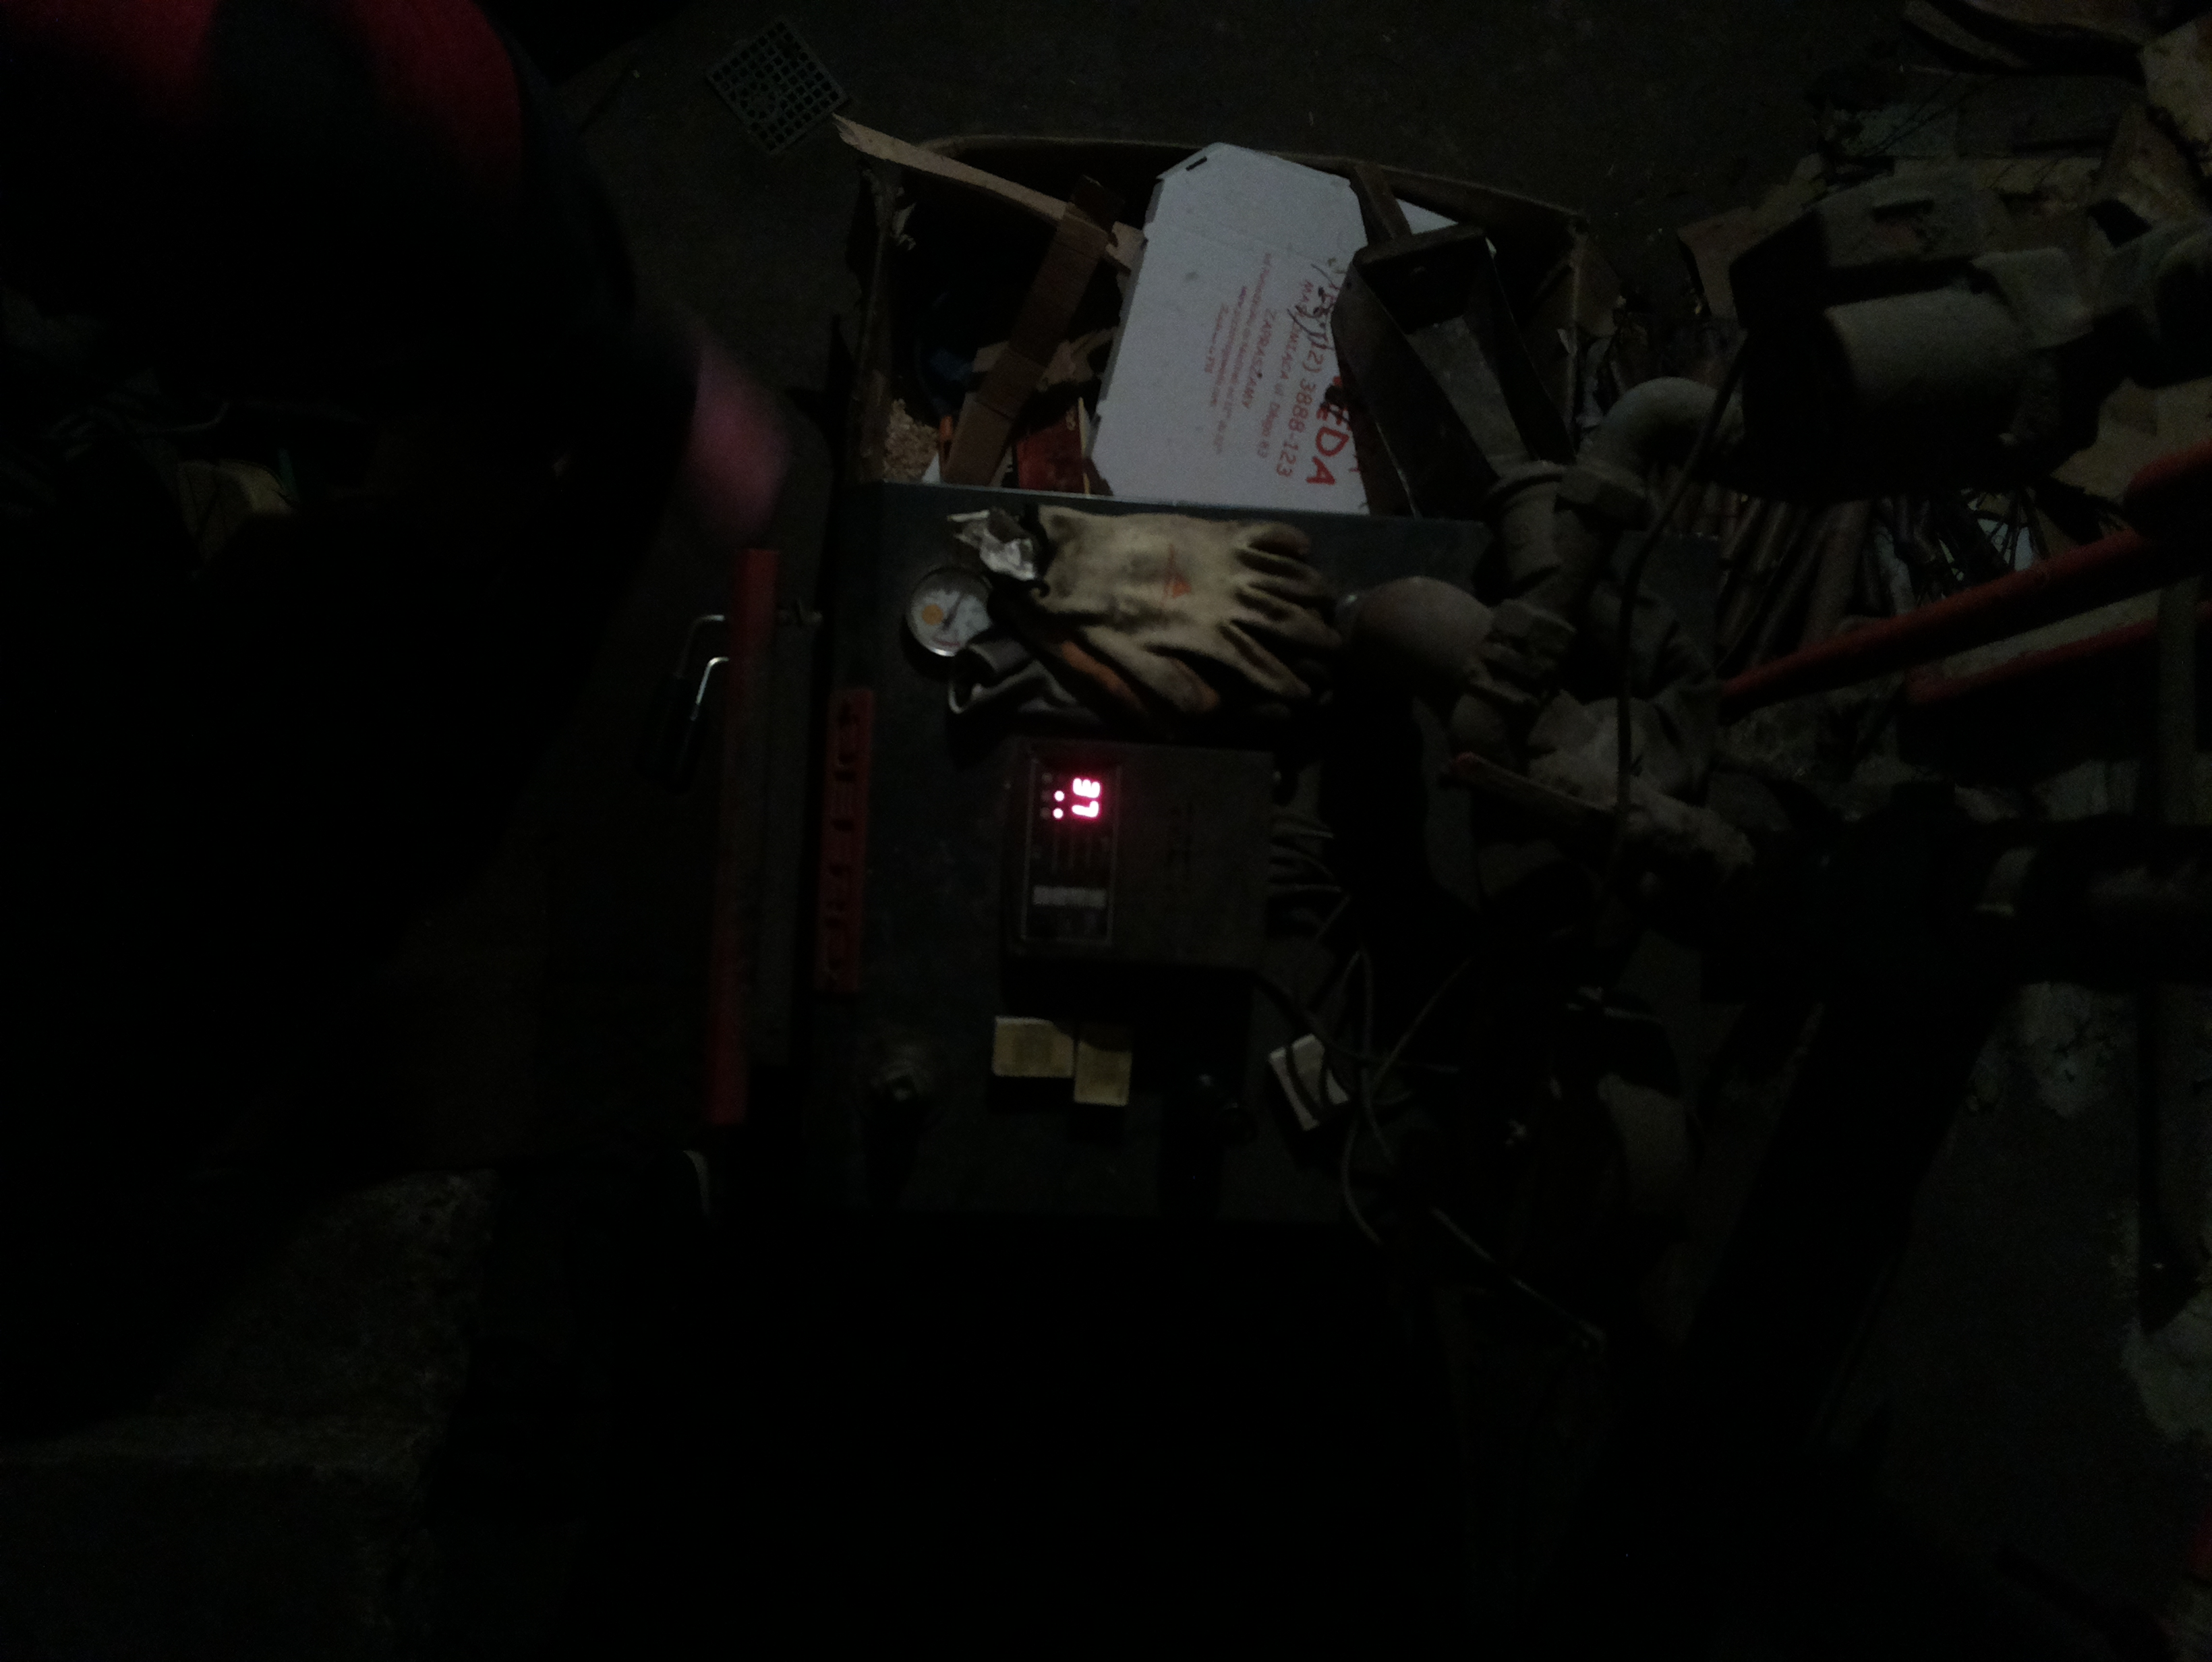

In [5]:
image_pil

In [6]:
import cv2
from matplotlib import pyplot as plt

In [7]:
image = cv2.imread(image_path)

In [8]:
plt.imshow(image)

NameError: name 'plt' is not defined

In [6]:
from skimage import io, color, util, transform, morphology, filters, feature
import numpy as np
%matplotlib inline

In [7]:
image = io.imread(image_path)

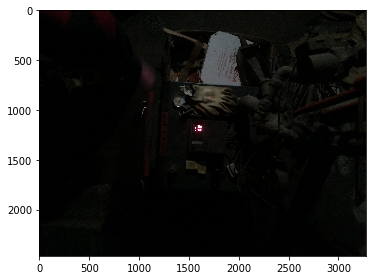

In [8]:
io.imshow(image)

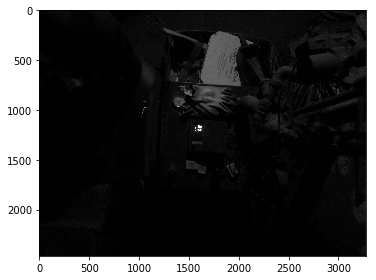

In [183]:
grey_image = color.rgb2grey(image)
io.imshow(grey_image)

In [184]:
x1, y1, x2, y2 = 1582, 1220, 1640, 1148

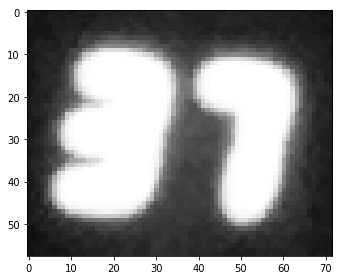

In [185]:
# cropped = util.crop(grey_image, ((y2, y1), (x1, x2)))
cropped = grey_image[y2:y1,x1:x2]
rotated = transform.rotate(cropped, 90, resize=True)
io.imshow(rotated)

In [55]:
new_image_path = 'photos/cropped.jpg'
io.imsave(new_image_path, rotated)

e:\moje pliki\programy\.python_envs\temperaturereader\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


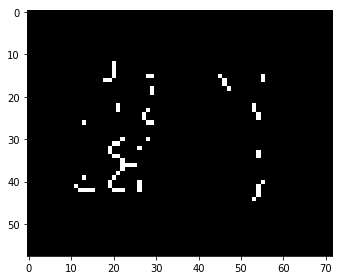

In [186]:
skeleton = morphology.skeletonize(rotated)
io.imshow(skeleton)

(<Figure size 720x576 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017445B52F28>,
       dtype=object))

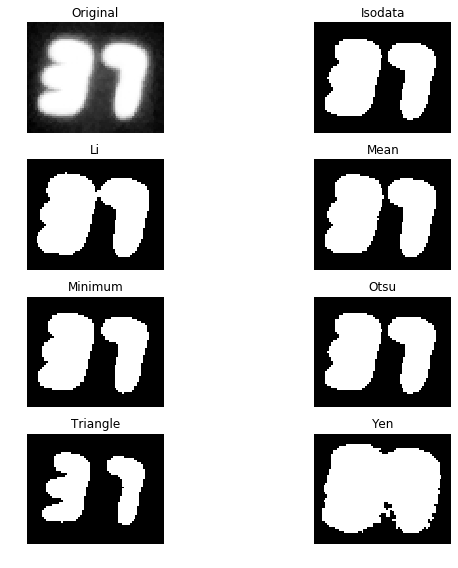

In [187]:
filters.try_all_threshold(rotated, figsize=(10, 8), verbose=False)

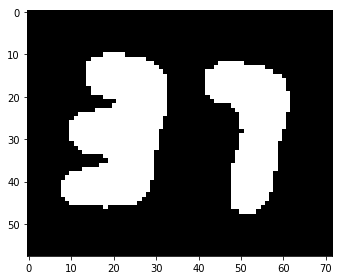

In [188]:
## Global threshold
# manual_value = 0.98
# thresholded = rotated > 0.98
threshold_value = filters.threshold_triangle(rotated)
thresholded = rotated > threshold_value
io.imshow(thresholded)

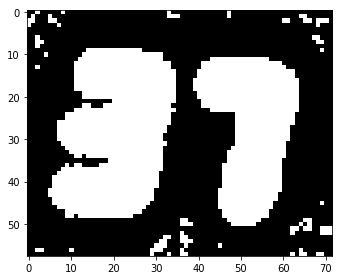

In [189]:
## Local threshold
# manual_value = 0.98
# thresholded = rotated > 0.98
threshold_value = filters.threshold_local(rotated, block_size=23)
thresholded = rotated > threshold_value
io.imshow(thresholded)

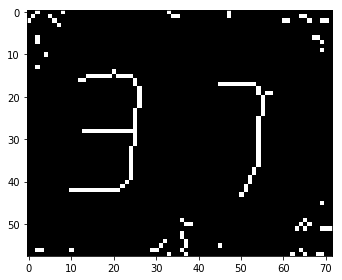

In [190]:
skeleton = morphology.skeletonize(thresholded)
io.imshow(skeleton)

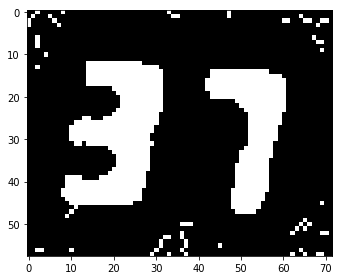

In [191]:
## Thinning
thinned = morphology.thin(thresholded, max_iter=3)
io.imshow(thinned)

In [117]:
new_image_path = 'photos/temp.png'
io.imsave(new_image_path, thresholded)

e:\moje pliki\programy\.python_envs\temperaturereader\lib\site-packages\skimage\io\_io.py:142: UserWarning: photos/temp.png is a boolean image: setting True to 1 and False to 0
  warn('%s is a boolean image: setting True to 1 and False to 0' % fname)


In [192]:
image_pil = Image.fromarray(util.img_as_int(thinned))
print(pytesseract.image_to_string(image_pil))

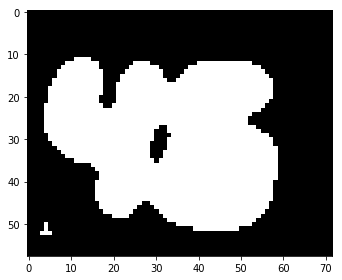

In [166]:
median_image = filters.median(thresholded, morphology.disk(3))
io.imshow(median_image)

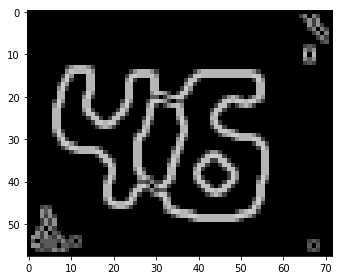

In [175]:
edges = filters.sobel(thinned)
io.imshow(edges)

In [9]:
from skimage import io, transform, color, filters, morphology

def fetch_temperature(raw_image_path):
    full_image = load_image(raw_image_path)
    temperature_image_color = fetch_temperature_area(full_image)
    processed_temperature_image = apply_image_processing(temperature_image_color)
    
    return processed_temperature_image

def load_image(image_path):
    return io.imread(image_path)

def fetch_temperature_area(full_image):
    x1, y1, x2, y2 = 1582, 1220, 1640, 1148
    temperature_area = full_image[y2:y1,x1:x2]
    return transform.rotate(temperature_area, 90, resize=True)

def apply_image_processing(image):
    image_grey = convert_to_grey(image)
    thresholded = apply_thresholding(image_grey)
    thinned = apply_thin(thresholded)
    clean_image = cleanup_image(thinned)
    
    return clean_image

def convert_to_grey(image_color):
    return color.rgb2grey(image_color)

def apply_thresholding(image_grey):
    threshold_value = filters.threshold_local(image_grey, block_size=23)
    thresholded = image_grey > threshold_value
    
    return thresholded

def apply_thin(image_grey):
    return morphology.thin(image_grey, max_iter=3)

def cleanup_image(image):
    opened_image =  morphology.opening(image, selem=morphology.disk(2))
    return morphology.remove_small_objects(opened_image, min_size=100)
    

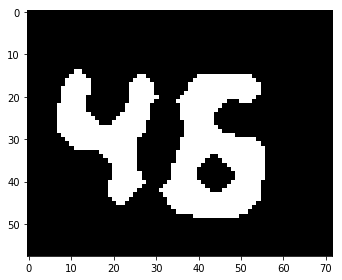

In [14]:
image_path = "photos/ciemne.jpg"
temperature_image = fetch_temperature(image_path)
io.imshow(temperature_image)

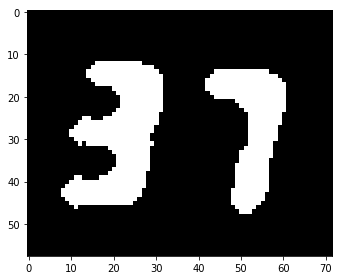

In [15]:
image_path = "photos/jasne.jpg"
temperature_image = fetch_temperature(image_path)
io.imshow(temperature_image)

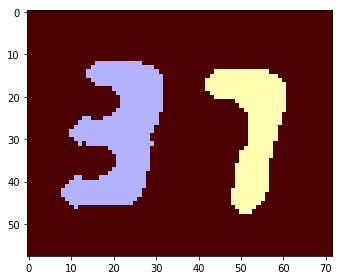

In [16]:
from skimage.measure import label, regionprops
from skimage import color

labeled_image = label(temperature_image)
labeled_image_overlay = color.label2rgb(labeled_image, image=temperature_image)

io.imshow(labeled_image_overlay)

478
(35, 24)
329
(34, 19)


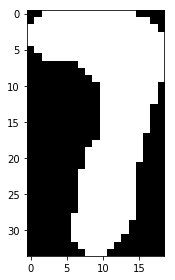

In [17]:
for region in regionprops(labeled_image):
    print(region.area)
    digit_image = region.image
    print(digit_image.shape)
    io.imshow(digit_image)

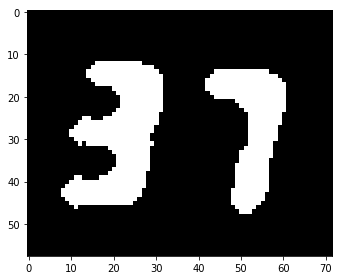

In [18]:
clear_image = morphology.remove_small_objects(temperature_image, min_size=100)
io.imshow(clear_image)

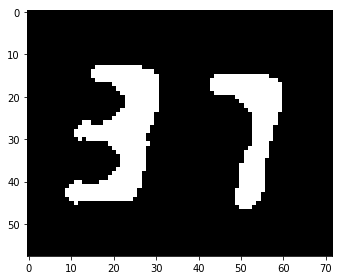

In [19]:
eroded_image = morphology.erosion(temperature_image, selem=morphology.disk(1))
io.imshow(eroded_image)

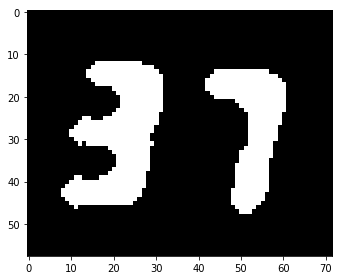

In [20]:
opened_image = morphology.opening(temperature_image, selem=morphology.disk(1))
io.imshow(opened_image)

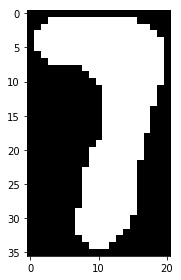

In [21]:
padded_digit_image = np.pad(digit_image, 1, 'constant', constant_values=False)
io.imshow(padded_digit_image)

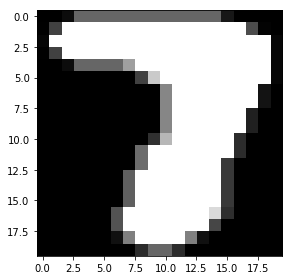

In [26]:
resized_image = transform.resize(padded_digit_image, (20,20), mode='reflect', preserve_range=True)
io.imshow(resized_image)

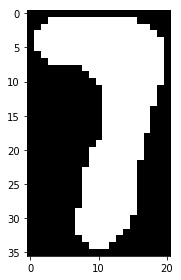

In [23]:
io.imshow(padded_digit_image)